# Exploratory data analysis

In [1]:
# !pip install regex
# !pip install wheel
# !apt-get install python3

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


from nltk.corpus import stopwords

import pickle

%config InlineBackend.figure_format = 'retina'

In [3]:
df_reddit = pickle.load(open('../DataSet/df_reddit.pkl', 'rb'))
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit
0,illichian,1579413305,i.imgur.com,eqsltj,2,False,link,1,star shine saturn ring,NASA
1,itstie,1579412680,i.redd.it,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA
2,NASA_POTD_bot,1579410507,apod.nasa.gov,eqs6cb,0,False,Empty,1,incred expand crab nebula,NASA
3,AMC-Eagle85,1579410277,i.redd.it,eqs4zd,6,False,Empty,1,columbia readi st,NASA
4,BorisTheSpacePerson,1579404939,i.redd.it,eqr7wu,0,False,Empty,1,went ksc christma got see made interest spacef...,NASA


In [4]:
df_reddit.shape

(12000, 10)

In [5]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
author          12000 non-null object
created_utc     12000 non-null int64
domain          12000 non-null object
id              12000 non-null object
num_comments    12000 non-null int64
over_18         12000 non-null bool
post_hint       12000 non-null object
score           12000 non-null int64
text_merged     12000 non-null object
subreddit       12000 non-null object
dtypes: bool(1), int64(3), object(6)
memory usage: 855.5+ KB


## Exploratory data analysis on data.

* Count the number of words on text and add a new column with number of words.
* Apply sentiment analyzer on each text and add it as a new column.
* seperate the date and add it to data.

In [7]:
nltk.download('vader_lexicon')
# Mighani Approach:
#Counting the charcaters and word in "text_merged"
#df_reddit["text_char_count"] = df_reddit["text_merged"].map(lambda x: len(x))
df_reddit["word_count*"] = df_reddit["text_merged"].map(lambda x: len(x.split(" ")))

#Sentiment analyzer
sent = SentimentIntensityAnalyzer()

df_reddit['sentiment_score*'] = df_reddit["text_merged"].apply(lambda x: sent.polarity_scores(x)['compound'])

df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amin/nltk_data...


In [8]:
df_reddit.shape

(12000, 13)

In [9]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
author              12000 non-null object
created_utc         12000 non-null int64
domain              12000 non-null object
id                  12000 non-null object
num_comments        12000 non-null int64
over_18             12000 non-null bool
post_hint           12000 non-null object
score               12000 non-null int64
text_merged         12000 non-null object
subreddit           12000 non-null object
word_count*         12000 non-null int64
sentiment_score*    12000 non-null float64
date                12000 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.1+ MB


Lets turn the subreddit column to numerical values.

In [10]:
df_reddit['target'] = df_reddit['subreddit'].replace({"NASA": 1, "Space_discussion": 0})
targets = df_reddit['target']

In [11]:
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit,word_count*,sentiment_score*,date,target
0,illichian,1579413305,i.imgur.com,eqsltj,2,False,link,1,star shine saturn ring,NASA,4,0.0000,2020-01-19 05:55:05,1
1,itstie,1579412680,i.redd.it,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA,5,0.0000,2020-01-19 05:44:40,1
2,NASA_POTD_bot,1579410507,apod.nasa.gov,eqs6cb,0,False,Empty,1,incred expand crab nebula,NASA,4,0.3182,2020-01-19 05:08:27,1
3,AMC-Eagle85,1579410277,i.redd.it,eqs4zd,6,False,Empty,1,columbia readi st,NASA,3,0.0000,2020-01-19 05:04:37,1
4,BorisTheSpacePerson,1579404939,i.redd.it,eqr7wu,0,False,Empty,1,went ksc christma got see made interest spacef...,NASA,8,0.4588,2020-01-19 03:35:39,1


Drop the column named domain below.

In [12]:
df_reddit.drop(columns="domain", inplace = True)

In [13]:
df_reddit.head()

,author,created_utc,id,num_comments,over_18,post_hint,score,text_merged,subreddit,word_count*,sentiment_score*,date,target
0,illichian,1579413305,eqsltj,2,False,link,1,star shine saturn ring,NASA,4,0.0000,2020-01-19 05:55:05,1
1,itstie,1579412680,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA,5,0.0000,2020-01-19 05:44:40,1
2,NASA_POTD_bot,1579410507,eqs6cb,0,False,Empty,1,incred expand crab nebula,NASA,4,0.3182,2020-01-19 05:08:27,1
3,AMC-Eagle85,1579410277,eqs4zd,6,False,Empty,1,columbia readi st,NASA,3,0.0000,2020-01-19 05:04:37,1
4,BorisTheSpacePerson,1579404939,eqr7wu,0,False,Empty,1,went ksc christma got see made interest spacef...,NASA,8,0.4588,2020-01-19 03:35:39,1


Check out the column "over_18" and replace dtype with int if the dtype is obj.

In [14]:
df_reddit['over_18'].describe()

count     12000
unique        2
top       False
freq      11993
Name: over_18, dtype: object

In [15]:
df_reddit['over_18'] = df_reddit['over_18'].astype("int")

In [16]:
df_reddit['over_18'].describe()

count    12000.000000
mean         0.000583
std          0.024146
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: over_18, dtype: float64

Check out the distribution of data.

In [1]:
# sns.set()
# columns = df_reddit.columns
# sns.pairplot(df_reddit[columns],hue="target", palette="husl", markers=["o", "s"])
# plt.show()
# plt.savefig("../Figures/All_distribution_plots.png")

In [18]:
print(df_reddit.groupby("target")["sentiment_score*"].describe().T)

target            0            1
count   6000.000000  6000.000000
mean       0.099742     0.104667
std        0.313117     0.293992
min       -0.996700    -0.972300
25%        0.000000     0.000000
50%        0.000000     0.000000
75%        0.226300     0.077200
max        0.998500     0.994000


Keep the track of nasa and space_discussion as follow.

In [19]:
sub_nasa_mask = df_reddit["target"] == 1
sub_space_mask = df_reddit["target"] == 0

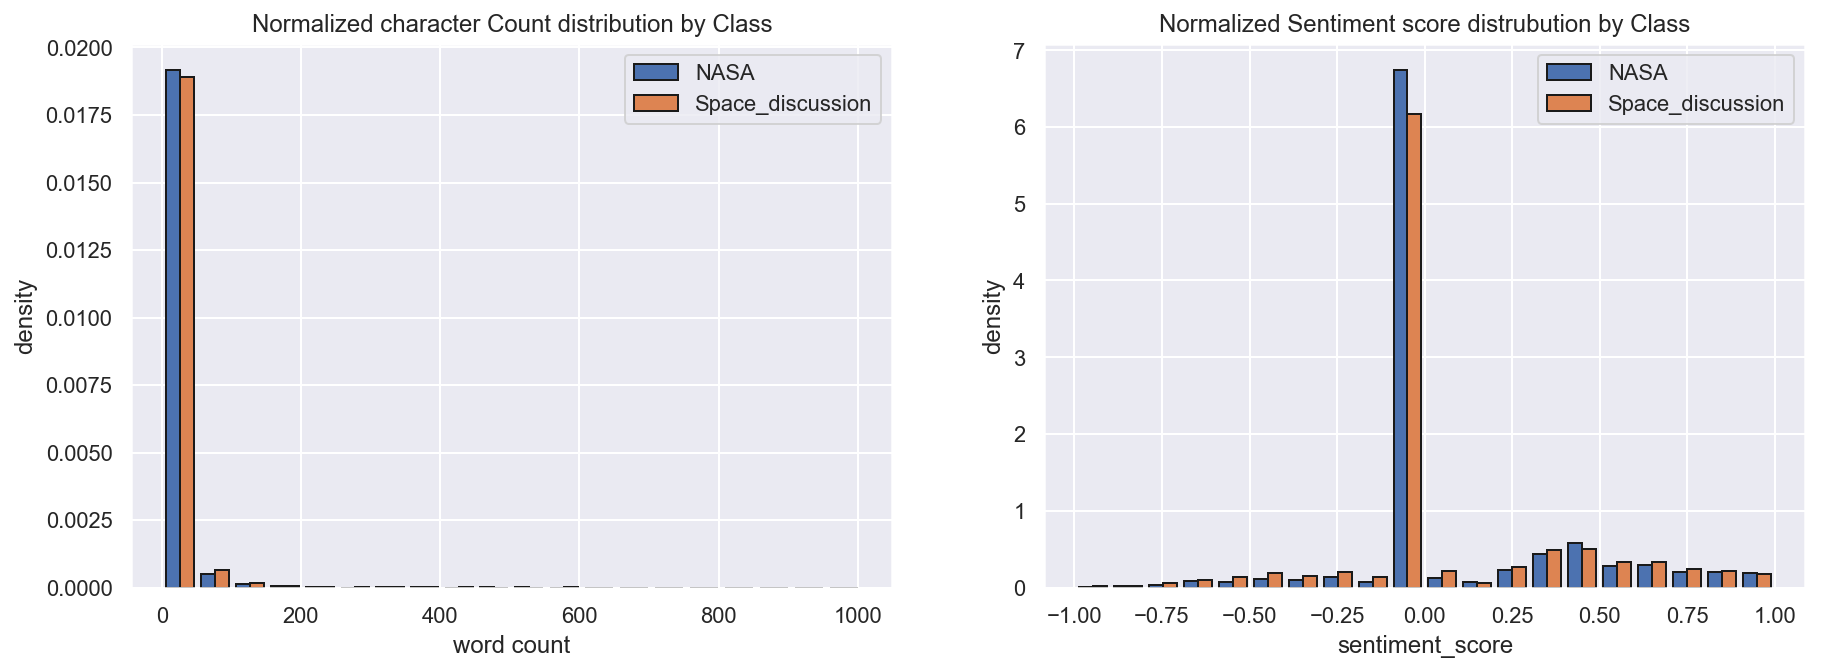

In [20]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist([df_reddit[sub_nasa_mask]['word_count*'], 
          df_reddit[sub_space_mask]['word_count*']],
          bins=20, ec='k', density=True)
plt.title('Normalized character Count distribution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('word count'); plt.ylabel('density')


plt.subplot(1, 2, 2)
plt.hist([df_reddit[sub_nasa_mask]['sentiment_score*'], 
          df_reddit[sub_space_mask]['sentiment_score*']],
          bins=20, ec='k', density=True)
plt.title('Normalized Sentiment score distrubution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('sentiment_score'); plt.ylabel('density')

plt.savefig("../Figures/distribution_plots.png")

Check out the corrolation between variables.

In [21]:
df_reddit_corr = df_reddit.drop(columns=["created_utc"]).corr()

In [22]:
df_reddit_corr

,num_comments,over_18,score,word_count*,sentiment_score*,target
num_comments,1.000000,-0.002652,0.155636,0.004363,-0.001609,-0.079623
over_18,-0.002652,1.000000,-0.003192,0.006066,-0.008160,-0.010354
score,0.155636,-0.003192,1.000000,-0.025741,0.002846,0.113868
word_count*,0.004363,0.006066,-0.025741,1.000000,0.291378,-0.050731
sentiment_score*,-0.001609,-0.008160,0.002846,0.291378,1.000000,0.008109
target,-0.079623,-0.010354,0.113868,-0.050731,0.008109,1.000000


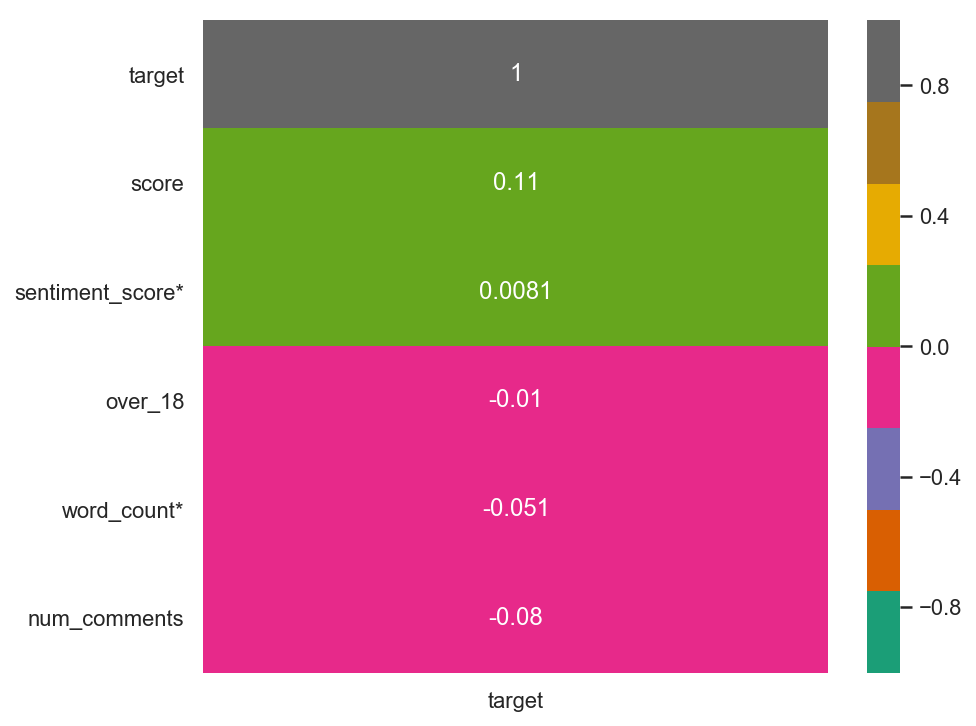

In [23]:
plt.figure(figsize=(7,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='Dark2',
            annot=True);

plt.savefig("../Figures/EDA_corr_plot.png")

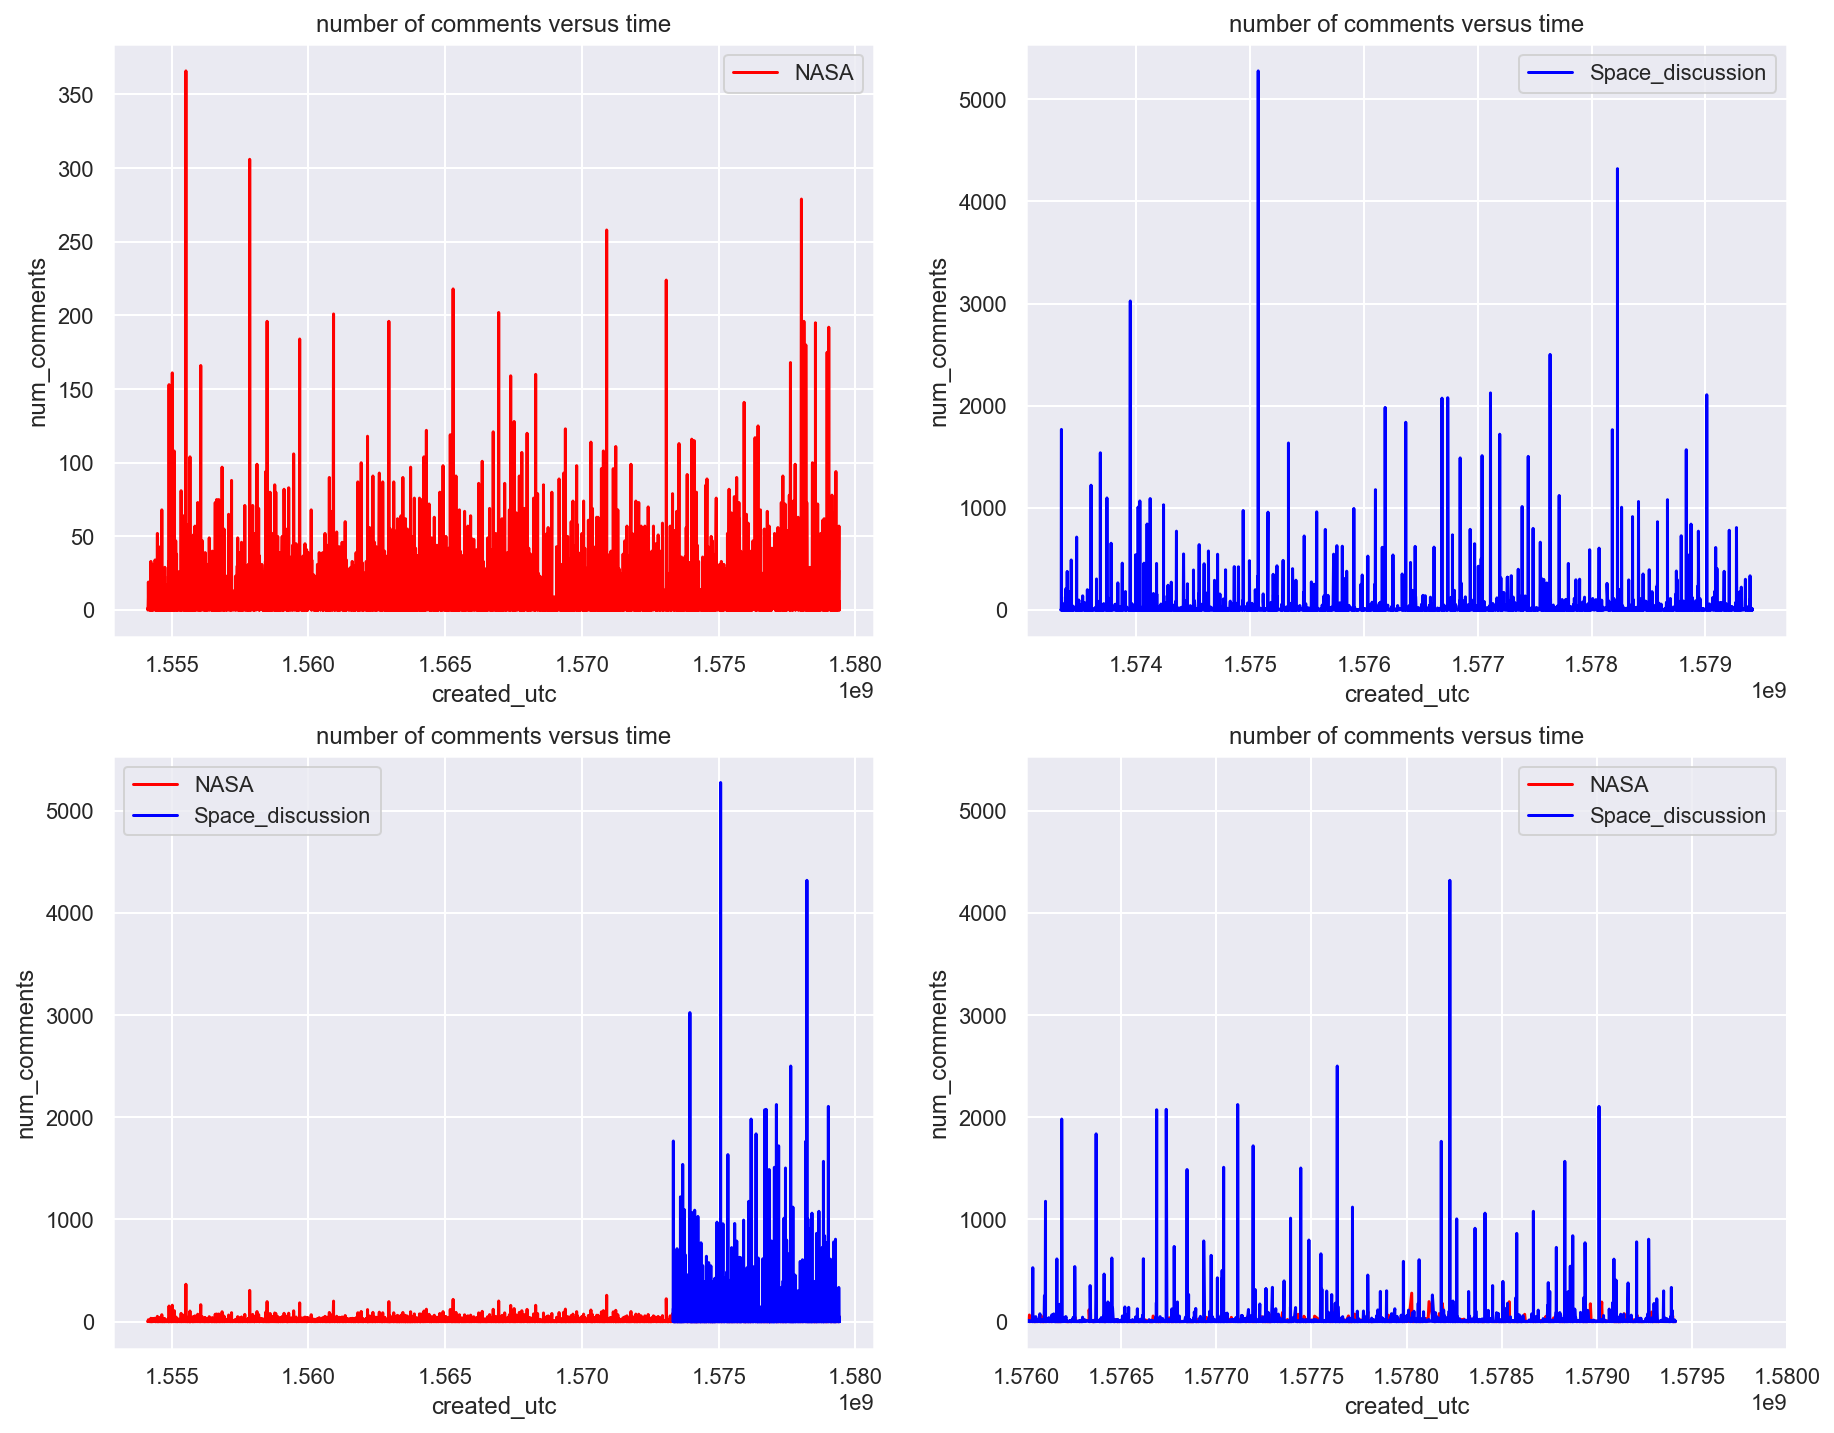

In [24]:
plt.figure(figsize=(15,12))

plt.subplot(2, 2, 1)
plt.plot(df_reddit[sub_nasa_mask]['created_utc'], df_reddit[sub_nasa_mask]['num_comments'], color="red")
plt.xlabel('created_utc'); plt.ylabel('num_comments')
plt.title('number of comments versus time', fontsize=12)
plt.legend(['NASA'])

plt.subplot(2, 2, 2)
plt.plot(df_reddit[sub_space_mask]['created_utc'], df_reddit[sub_space_mask]['num_comments'], color="blue")
plt.xlabel('created_utc'); plt.ylabel('num_comments')
plt.title('number of comments versus time', fontsize=12)
plt.legend(['Space_discussion'])

plt.subplot(2, 2, 3)
plt.plot(df_reddit[sub_nasa_mask]['created_utc'], df_reddit[sub_nasa_mask]['num_comments'], color="red")
plt.plot(df_reddit[sub_space_mask]['created_utc'], df_reddit[sub_space_mask]['num_comments'], color="blue")
plt.xlabel('created_utc'); plt.ylabel('num_comments')
plt.title('number of comments versus time', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])

plt.subplot(2, 2, 4)
plt.plot(df_reddit[sub_nasa_mask]['created_utc'], df_reddit[sub_nasa_mask]['num_comments'], color="red")
plt.plot(df_reddit[sub_space_mask]['created_utc'], df_reddit[sub_space_mask]['num_comments'], color="blue")
plt.xlabel('created_utc'); plt.ylabel('num_comments')
plt.xlim(1576000000, 1580000000)
plt.title('number of comments versus time', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])

plt.savefig("../Figures/CommentsVStime_plot.png")

In [25]:
df_reddit.columns

Index(['author', 'created_utc', 'id', 'num_comments', 'over_18', 'post_hint',
       'score', 'text_merged', 'subreddit', 'word_count*', 'sentiment_score*',
       'date', 'target'],
      dtype='object')

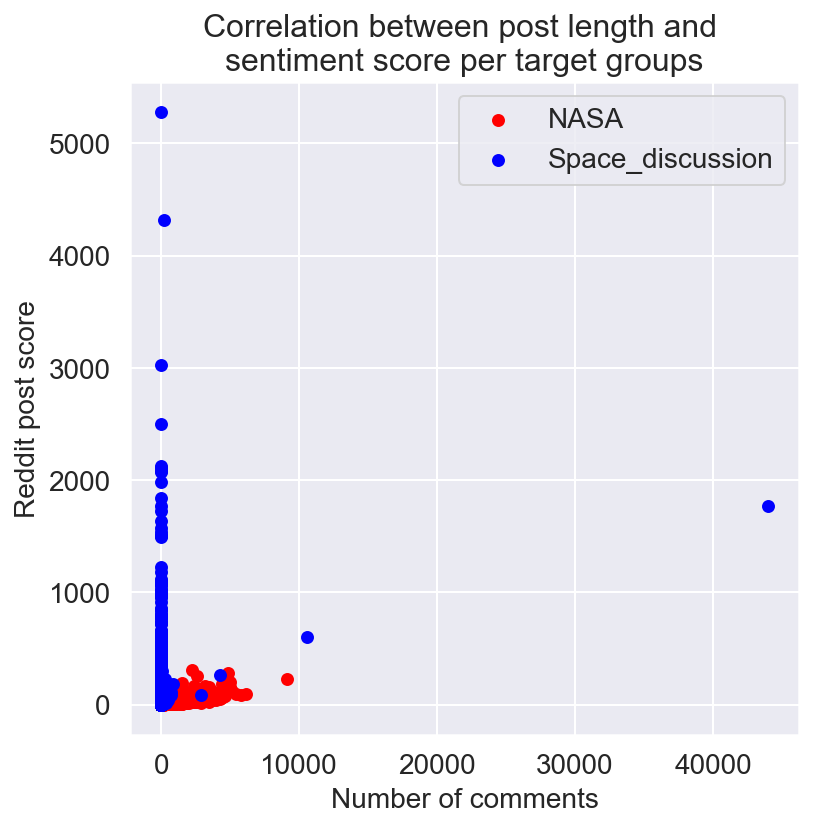

In [26]:
column1 = 'score'
column2 = 'num_comments'

plt.figure(figsize=(6,6))

#POlotting target 1

x_plt = (df_reddit[sub_nasa_mask][column1])
y_plt = df_reddit[sub_nasa_mask][column2]

plt.scatter(x_plt, y_plt, color="red", s= 30)
#plt.errorbar(x_mean_plt, y_mean_plt, xerr=x_err_plt, yerr=y_err_plt)

x_plt = (df_reddit[sub_space_mask][column1])
y_plt = df_reddit[sub_space_mask][column2]

plt.scatter(x_plt, y_plt, color="blue", s = 30)

plt.title('Correlation between post length and \nsentiment score per target groups', fontsize=16)
plt.legend(['NASA', 'Space_discussion'],fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Reddit post score", fontsize = 14)
plt.xlabel("Number of comments", fontsize = 14);

plt.savefig("../Figures/a_medium_fig03.png")

## Engineering new variables 

Mak new variables and see if they improve the data corr.

In [27]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
author              12000 non-null object
created_utc         12000 non-null int64
id                  12000 non-null object
num_comments        12000 non-null int64
over_18             12000 non-null int64
post_hint           12000 non-null object
score               12000 non-null int64
text_merged         12000 non-null object
subreddit           12000 non-null object
word_count*         12000 non-null int64
sentiment_score*    12000 non-null float64
date                12000 non-null datetime64[ns]
target              12000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 1.2+ MB


Here are int and float values in data set.
```
created_utc       
num_comments      
over_18           
score             
word_count*
sentiment_score*
```

In [28]:
column1 = 'score'
column2 = 'num_comments'
df_reddit["reaction*"] = df_reddit[column1] * df_reddit[column2]

column1 = 'score'
column2 = 'word_count*'
df_reddit["par2"] = df_reddit[column1] * df_reddit[column2]

column1 = 'score'
column2 = 'sentiment_score*'
df_reddit["par3"] = df_reddit[column1] * df_reddit[column2]

In [29]:
df_reddit_corr = df_reddit.corr()
df_reddit_corr

,created_utc,num_comments,over_18,score,word_count*,sentiment_score*,target,reaction*,par2,par3
created_utc,1.000000,0.055908,0.004956,-0.117924,0.041179,0.011073,-0.672676,0.004064,-0.062785,-0.010734
num_comments,0.055908,1.000000,-0.002652,0.155636,0.004363,-0.001609,-0.079623,0.153008,0.116553,0.141157
over_18,0.004956,-0.002652,1.000000,-0.003192,0.006066,-0.008160,-0.010354,-0.000390,-0.001843,-0.000754
score,-0.117924,0.155636,-0.003192,1.000000,-0.025741,0.002846,0.113868,0.737056,0.683199,0.733891
word_count*,0.041179,0.004363,0.006066,-0.025741,1.000000,0.291378,-0.050731,-0.002165,0.069844,0.004536
sentiment_score*,0.011073,-0.001609,-0.008160,0.002846,0.291378,1.000000,0.008109,0.015470,0.039919,0.060984
target,-0.672676,-0.079623,-0.010354,0.113868,-0.050731,0.008109,1.000000,-0.004234,0.062256,0.013087
reaction*,0.004064,0.153008,-0.000390,0.737056,-0.002165,0.015470,-0.004234,1.000000,0.615093,0.937687
par2,-0.062785,0.116553,-0.001843,0.683199,0.069844,0.039919,0.062256,0.615093,1.000000,0.654529
par3,-0.010734,0.141157,-0.000754,0.733891,0.004536,0.060984,0.013087,0.937687,0.654529,1.000000


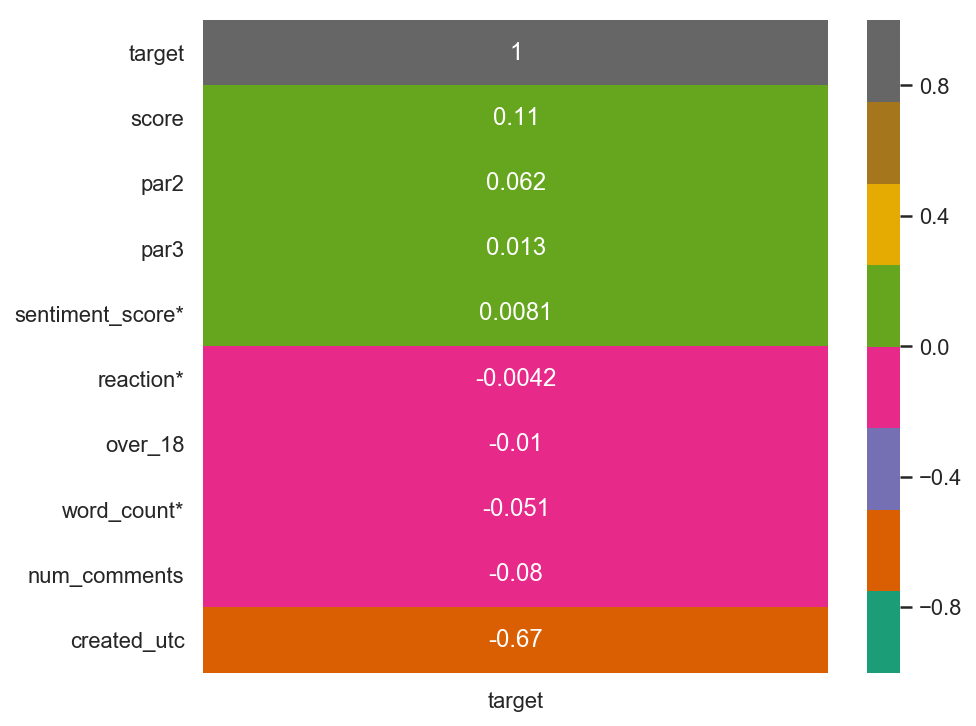

In [30]:
plt.figure(figsize=(7,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='Dark2',
            annot=True);

plt.savefig("../Figures/EDA_corr_plot_2.png")

## Let's count vectorize the data

* Add some stop words to the general list
* Apply the new list of stop words list (extend)
* Apply count vectorize to the data

In [31]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['http', 'would', 'com']
stopwords.extend(newStopWords)

cvec = CountVectorizer(stop_words=stopwords, min_df=4, max_df=1.0,
                       ngram_range=(1,2))

In [32]:
term_mat = cvec.fit_transform(df_reddit['text_merged'])

In [33]:
len(cvec.get_feature_names())

7813

In [34]:
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())
term_df.insert(0, 'targets', targets)

### Here is the top 10 words used in data

In [35]:
top_words_nasa = list(term_df.groupby('targets').
    mean().T.sort_values(0, ascending=False).head(20).index)

top_words_space_dis = list(term_df.groupby('targets').
    mean().T.sort_values(1, ascending=False).head(20).index)

top_words_overlap = [word for word in top_words_space_dis if word in top_words_nasa]
top_words_overlap

['nasa',
 'space',
 'moon',
 'earth',
 'mar',
 'year',
 'launch',
 'like',
 'one',
 'first',
 'new',
 'amp',
 'time']

In [36]:
pickle.dump(df_reddit, open('../DataSet/df_reddit_for_model.pkl', 'wb'))